<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv', index_col=0)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

The following describes the dataset variables:

-      CRIM - per capita crime rate by town

-      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

-      INDUS - proportion of non-retail business acres per town.

-      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

-      NOX - nitric oxides concentration (parts per 10 million)

-      RM - average number of rooms per dwelling

-      AGE - proportion of owner-occupied units built prior to 1940

-      DIS - weighted distances to five Boston employment centres

-      RAD - index of accessibility to radial highways

-      TAX - full-value property-tax rate per $10,000

-      PTRATIO - pupil-teacher ratio by town

-      LSTAT - % lower status of the population

-      MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate Descriptive Statistics and Visualizations

## Boxplot of Median value of owner-occupied homes (MEDV)

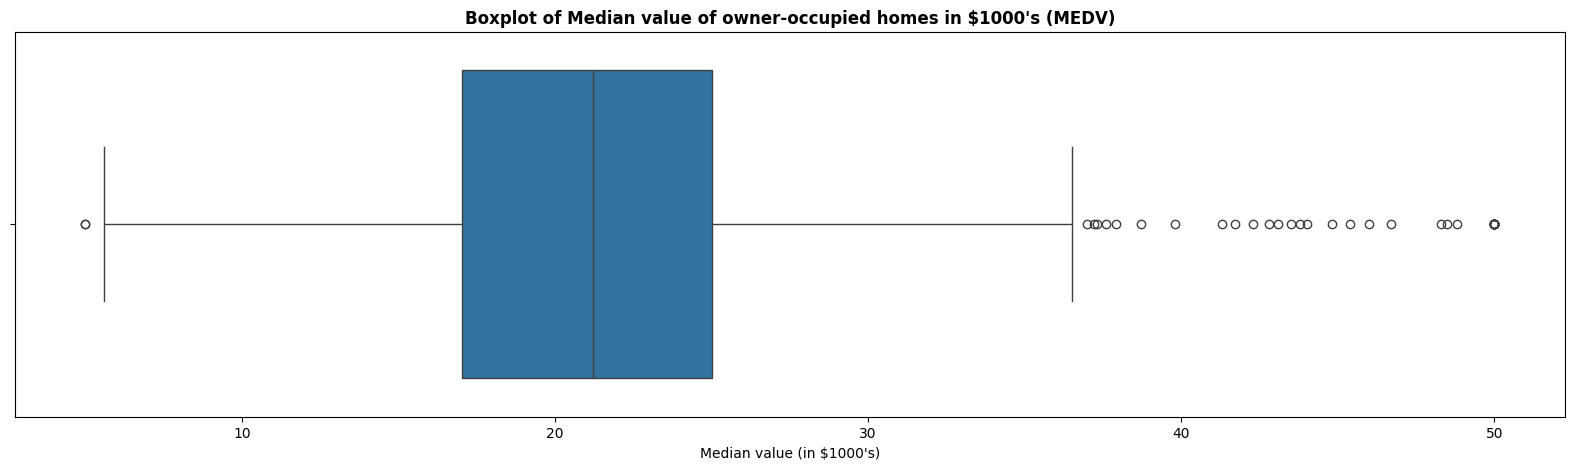

In [4]:
plt.figure(figsize=(20,5))
sns.boxplot(x=boston_df['MEDV'])
plt.title("Boxplot of Median value of owner-occupied homes in $1000's (MEDV)", weight='bold')
plt.xlabel("Median value (in $1000's)")
plt.show()

We can see that MEDV has a lot of outliers.

## Bar plot of the Charles river variable

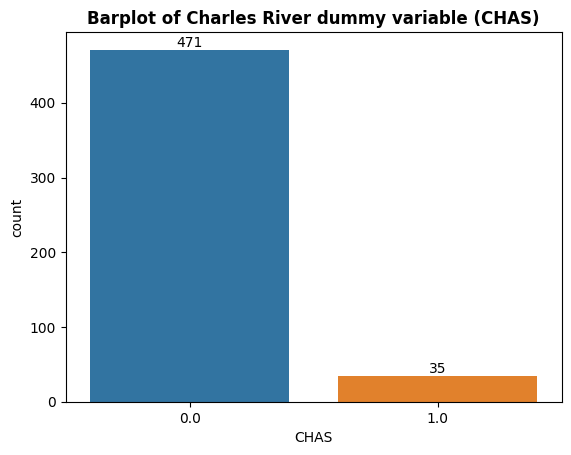

In [5]:
sns.countplot(x='CHAS', data=boston_df, hue='CHAS', legend=False)
ax = plt.gca()
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.title('Barplot of Charles River dummy variable (CHAS)', weight='bold')
plt.show()

There is a significant difference between the number of houses bounded by the Charles river and those which are not.  

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
boston_df['age_cat'] = pd.cut(boston_df.AGE, bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

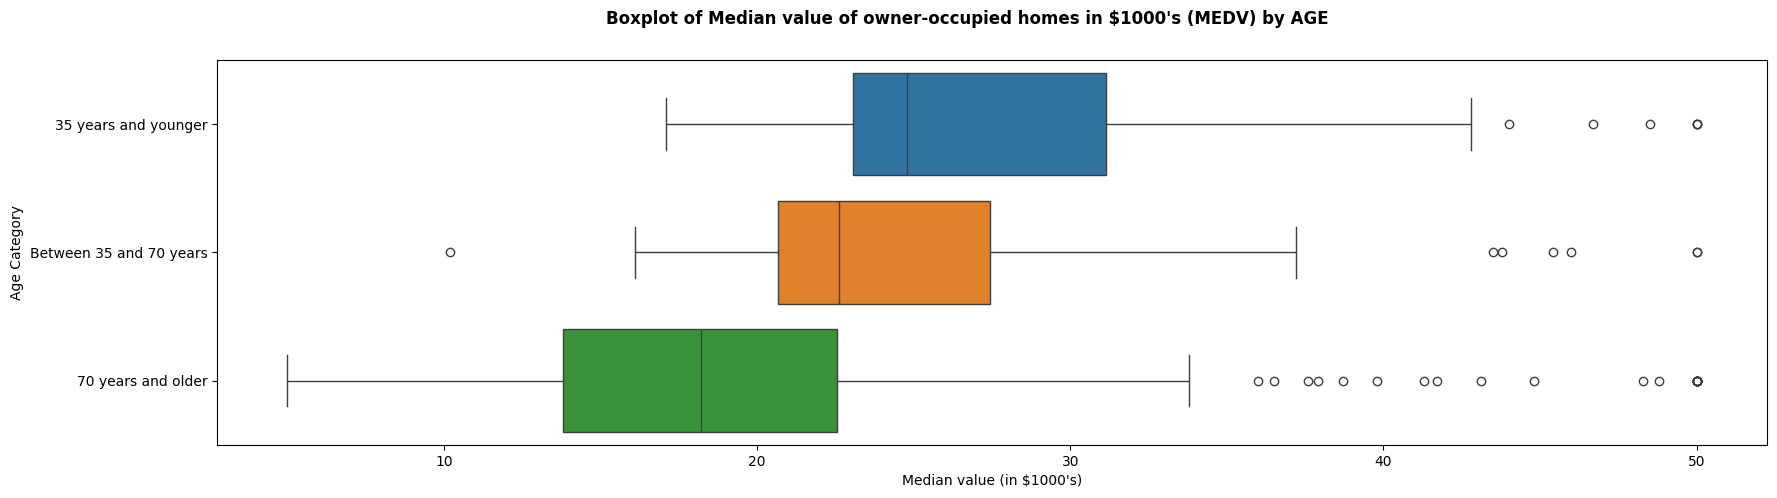

In [7]:
plt.figure(figsize=(20,5))
sns.boxplot(x='MEDV', y='age_cat', hue='age_cat', data=boston_df)
plt.suptitle("Boxplot of Median value of owner-occupied homes in $1000's (MEDV) by AGE", weight='bold')
plt.ylabel('Age Category')
plt.xlabel('Median value (in $1000\'s)')
plt.show()

The Median value of people which are 70 and older's homes in $1000's has the lowest mean but largest number of outliers.

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

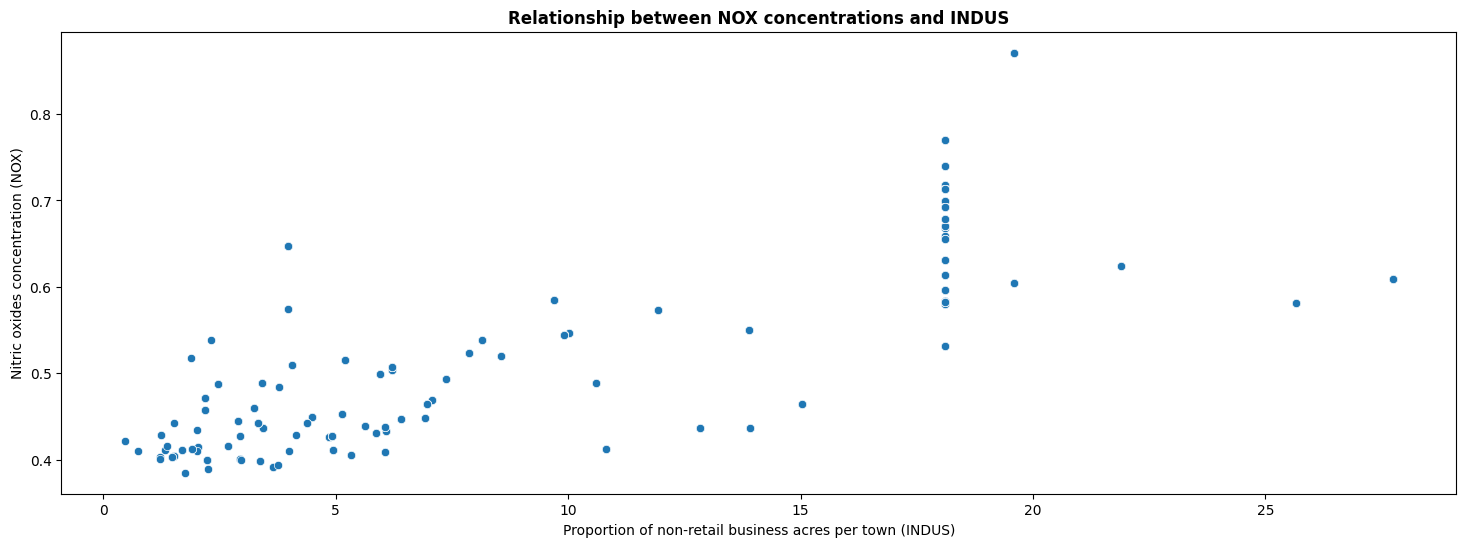

In [8]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between NOX concentrations and INDUS', weight='bold')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxides concentration (NOX)')
plt.show()

NOX generally increases while INDUS increases.

## Create a histogram for the pupil to teacher ratio variable

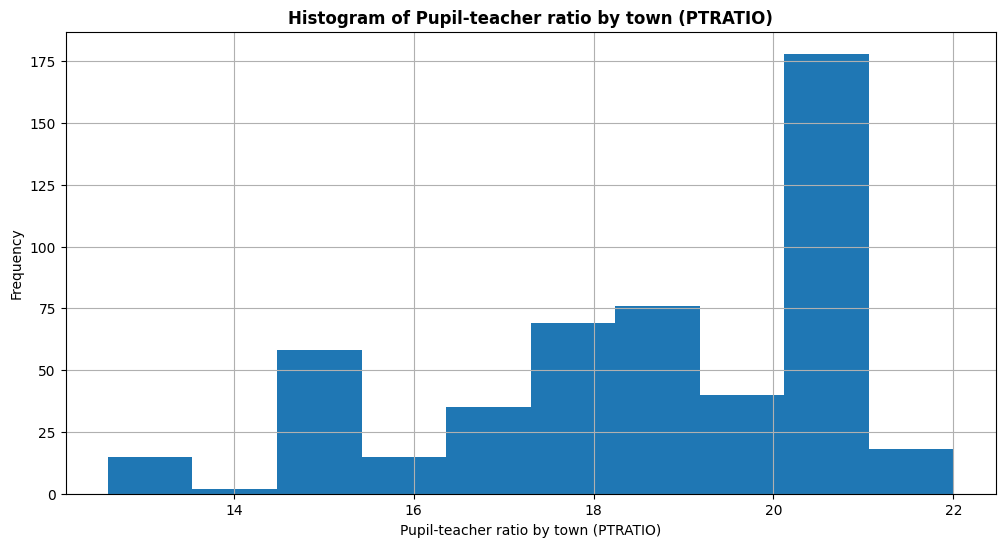

In [9]:
boston_df.hist('PTRATIO',  figsize=(12,6))
plt.title('Histogram of Pupil-teacher ratio by town (PTRATIO)', weight='bold')
plt.xlabel('Pupil-teacher ratio by town (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

Overall, the ratio of pupil-teacher in every towns is quite high.

# Task 3: Use the appropriate tests to answer the questions provided.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [10]:
# Extract the median values for houses bounded by the Charles river
charles_river = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Extract the median values for houses not bounded by the Charles river
not_charles_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the T-test for independent samples
t_statistic, p_value = stats.ttest_ind(charles_river, not_charles_river)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In this case, the P-value is significantly smaller than a typical alpha level (e.g., 0.05). This means that we can reject the null hypothesis (no difference in median values) and conclude that there is a significant difference in the median value of houses bounded by the Charles River and those not bounded by it.   



## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [11]:
# Perform the ANOVA test
model = ols('MEDV ~ AGE', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
AGE,6069.761065,1.0,83.477459,1.569982e-18
Residual,36646.534350,504.0,NaN,NaN


In this case, the p-value is extremely small (1.569982e-18), which is well below a typical alpha level (e.g., 0.05). Therefore, we can reject the null hypothesis (no difference in median values) and conclude that there is a significant difference in median house values based on the proportion of owner-occupied units built prior to 1940.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [12]:
# Perform the correlation test
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
correlation

0.763651446920914

Given the high positive correlation in this case, it's reasonable to conclude that there is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [13]:
# Perform Regression Analysis
X = boston_df['PTRATIO']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.61e-34
Time:                        13:54:57   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:
- <b>Coefficient:</b> This value represents the estimated change in the median house value (MEDV) for a one-unit increase in weighted distance (PTRATIO). In this case, a one-unit increase in weighted distance is associated with a decrease in median house value by 2.1572 units (assuming the units are in thousands of dollars).
- <b>P-value:</b> The extremely small p-value (0.000) indicates that this effect is statistically significant. It is highly unlikely that the observed relationship is due to chance.

Therefore, the regression model suggests that homes located further away from the five Boston employment centers tend to have lower median values. This could be due to factors such as increased commuting times, reduced accessibility to job opportunities, and potentially lower desirability for some buyers.